<a href="https://colab.research.google.com/github/jdshanbj/CLRS/blob/master/hw_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# for 3d interactive plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d


%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [216]:
def generate_linear_regression_data(n=100, d=1, coef=[5], intercept=1, sigma=0):
  x = np.random.randn(n,d)
  y = (np.dot(x, coef) + intercept).squeeze() + sigma * np.random.randn(n)
  return x, y

In [217]:
def gd_step(w, X, y, lr):
  # use current parameters to get y_hat
  y_hat = np.dot(X,w)
  # compute gradient for this y_hat
  grad = np.matmul(X.T, y_hat-y)
  # update weights
  w_new = w - lr*grad

  # we don't have to actually compute MSE
  # but I want to, for visualization 
  mse = 1.0/len(y)*np.sum(y_hat - y)**2

  return (w_new, mse, grad)


# 3.a

## learning rate = 0.0002


### Generate data

We will revisit our multiple linear regression.

In [218]:
w_true = [2, 6, 5]
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [6, 5]


In [219]:
n_samples = 100

In [220]:
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=coef, intercept=intercept)

### MSE contour

In [221]:
coefs = np.arange(2, 8, 0.05)
mses_coefs = np.zeros((len(coefs), len(coefs)))

for idx_1, c_1 in enumerate(coefs):
  for idx_2, c_2 in enumerate(coefs):
    y_coef = (intercept + np.dot(x,[c_1, c_2])).squeeze()
    mses_coefs[idx_1,idx_2] =  1.0/(len(y_coef)) * np.sum((y - y_coef)**2)

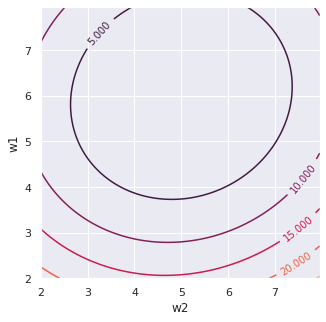

In [222]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs)
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');

### Perform gradient descent

In [223]:
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 3)

In [224]:
itr = 50
lr = 0.0002
w_init = [intercept, 2, 8]

In [225]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient
print("the estimate of w after 50 iteration is:",w_steps[49])

the estimate of w after 50 iteration is: [1.58626001 4.54616376 6.09103489]


### Visualize 


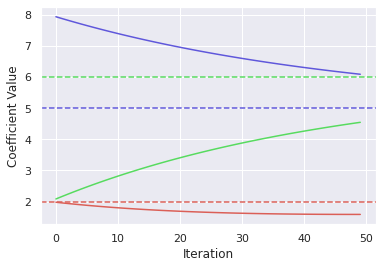

In [226]:
colors = sns.color_palette("hls", len(w_true))

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");


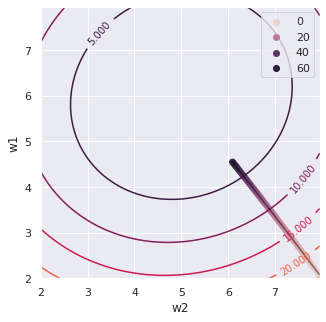

In [227]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);

In [228]:
w_star

array([1.58626001, 4.54616376, 6.09103489])

We can get to know that it starts to converge but does not get close enough to the optimum value within 50 iterations.

## learning rate = 0.002


### Generate data

We will revisit our multiple linear regression.

In [229]:
w_true = [2, 6, 5]
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [6, 5]


In [230]:
n_samples = 100

In [231]:
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=coef, intercept=intercept)

### MSE contour

In [232]:
coefs = np.arange(2, 8, 0.05)
mses_coefs = np.zeros((len(coefs), len(coefs)))

for idx_1, c_1 in enumerate(coefs):
  for idx_2, c_2 in enumerate(coefs):
    y_coef = (intercept + np.dot(x,[c_1, c_2])).squeeze()
    mses_coefs[idx_1,idx_2] =  1.0/(len(y_coef)) * np.sum((y - y_coef)**2)

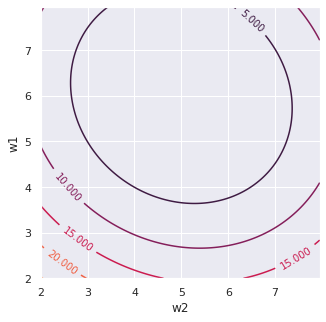

In [233]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs)
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');

### Perform gradient descent

In [234]:
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 3)

In [235]:
itr = 50
lr = 0.002
w_init = [intercept, 2, 8]

In [236]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient
print("the estimate of w after 50 iteration is:",w_steps[49])

the estimate of w after 50 iteration is: [1.99935059 5.99891846 5.00075456]


### Visualize 


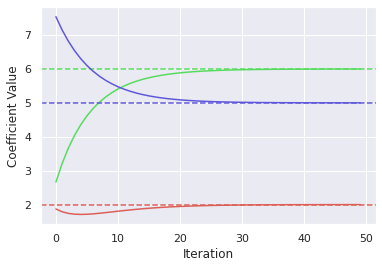

In [237]:
colors = sns.color_palette("hls", len(w_true))

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");


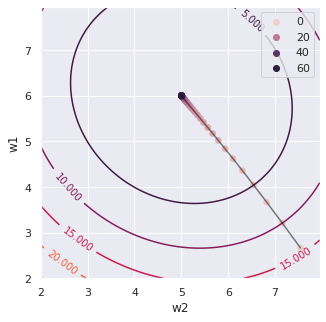

In [238]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);

In [239]:
w_star

array([1.99935059, 5.99891846, 5.00075456])

the gradient decent converges within 50 iterations.

## learning rate = 0.02

### Generate data

We will revisit our multiple linear regression.

In [240]:
w_true = [2, 6, 5]
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [6, 5]


In [241]:
n_samples = 100

In [242]:
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=coef, intercept=intercept)

### MSE contour

In [243]:
coefs = np.arange(2, 8, 0.05)
mses_coefs = np.zeros((len(coefs), len(coefs)))

for idx_1, c_1 in enumerate(coefs):
  for idx_2, c_2 in enumerate(coefs):
    y_coef = (intercept + np.dot(x,[c_1, c_2])).squeeze()
    mses_coefs[idx_1,idx_2] =  1.0/(len(y_coef)) * np.sum((y - y_coef)**2)

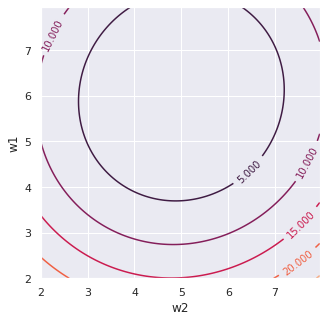

In [244]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs)
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');

### Perform gradient descent

In [245]:
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 3)

In [246]:
itr = 50
lr = 0.02
w_init = [intercept, 2, 8]

In [247]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient
print("the estimate of w after 50 iteration is:",w_steps[49])

the estimate of w after 50 iteration is: [4.66003541e+09 2.27295723e+09 3.80036727e+09]


### Visualize 


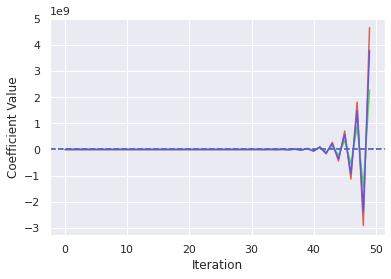

In [248]:
colors = sns.color_palette("hls", len(w_true))

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");


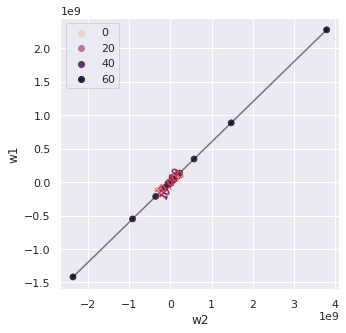

In [249]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);

In [250]:
w_star

array([4.66003541e+09, 2.27295723e+09, 3.80036727e+09])

In this situation, the GD diverges.

# 3.b

## learning rate = 0.1, n = 1


### Define a descent step

In [251]:
def sgd_step(w, X, y, lr, n):

  idx_sample = np.random.choice(X.shape[0], n, replace=True)

  X_sample = X[idx_sample, :]
  y_sample = y[idx_sample]

  # use current parameters to get y_hat
  y_hat = np.dot(X_sample,w)
  # compute gradient for this y_hat
  grad = np.matmul(X_sample.T, y_hat-y_sample)
  # update weights
  w_new = w - lr*grad

  return w_new


### Perform gradient descent

In [252]:
itr = 50
lr = 0.1
n = 1
w_init = [intercept, 2, 8]

In [253]:
w_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star = sgd_step(w_star, X, y, lr, n)
  w_steps[i] = w_star


In [254]:
w_star

array([2.12566081, 5.80452113, 4.90344386])

### Visualize 


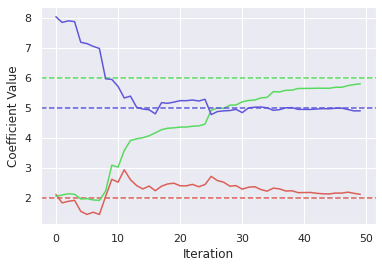

In [255]:
colors = sns.color_palette("hls", len(coef) + 1)

plt.axhline(y=intercept, linestyle='--', color=colors[0]);
sns.lineplot(np.arange(itr), w_steps[:,0], color=colors[0]);

for n in range(len(coef)):
  plt.axhline(y=coef[n], linestyle='--', color=colors[n+1]);
  sns.lineplot(np.arange(itr), w_steps[:,n+1], color=colors[n+1]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");


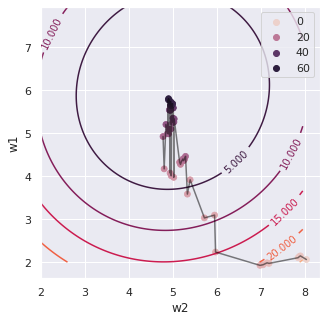

In [256]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);


Comment: We can acknowledge from the plot that it is not smooth to the optimal solution.

## learning rate = 0.01, n = 10


### Define a descent step

In [257]:
def sgd_step(w, X, y, lr, n):

  idx_sample = np.random.choice(X.shape[0], n, replace=True)

  X_sample = X[idx_sample, :]
  y_sample = y[idx_sample]

  # use current parameters to get y_hat
  y_hat = np.dot(X_sample,w)
  # compute gradient for this y_hat
  grad = np.matmul(X_sample.T, y_hat-y_sample)
  # update weights
  w_new = w - lr*grad

  return w_new


### Perform gradient descent

In [258]:
itr = 50
lr = 0.01
n = 10
w_init = [intercept, 2, 8]

In [259]:
w_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star = sgd_step(w_star, X, y, lr, n)
  w_steps[i] = w_star


In [260]:
w_star

array([2.01022799, 5.95033528, 5.01922325])

### Visualize 


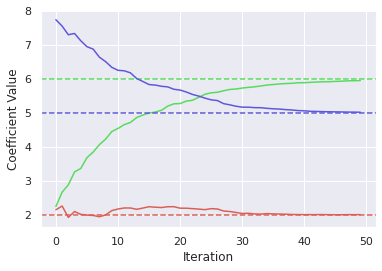

In [261]:
colors = sns.color_palette("hls", len(coef) + 1)

plt.axhline(y=intercept, linestyle='--', color=colors[0]);
sns.lineplot(np.arange(itr), w_steps[:,0], color=colors[0]);

for n in range(len(coef)):
  plt.axhline(y=coef[n], linestyle='--', color=colors[n+1]);
  sns.lineplot(np.arange(itr), w_steps[:,n+1], color=colors[n+1]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");


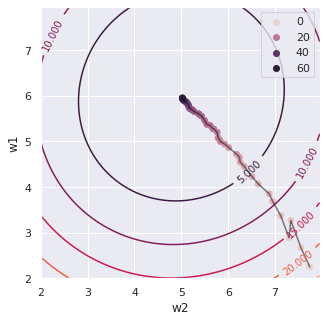

In [262]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);


Comment: We can acknowledge from the plot that it is not smooth to the optimal solution. But the smoothness is better than plot 1. In this situation, the solution at one of these steps is always better than the previous iteration but it is not that smooth.

## learning rate = 0.001, n = 100


### Define a descent step

In [263]:
def sgd_step(w, X, y, lr, n):

  idx_sample = np.random.choice(X.shape[0], n, replace=True)

  X_sample = X[idx_sample, :]
  y_sample = y[idx_sample]

  # use current parameters to get y_hat
  y_hat = np.dot(X_sample,w)
  # compute gradient for this y_hat
  grad = np.matmul(X_sample.T, y_hat-y_sample)
  # update weights
  w_new = w - lr*grad

  return w_new


### Perform gradient descent

In [264]:
itr = 50
lr = 0.001
n = 100
w_init = [intercept, 2, 8]

In [265]:
w_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star = sgd_step(w_star, X, y, lr, n)
  w_steps[i] = w_star


In [266]:
w_star

array([2.01408777, 5.9636163 , 5.00227034])

### Visualize 


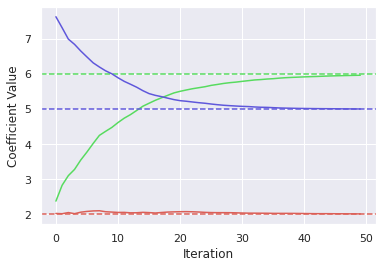

In [267]:
colors = sns.color_palette("hls", len(coef) + 1)

plt.axhline(y=intercept, linestyle='--', color=colors[0]);
sns.lineplot(np.arange(itr), w_steps[:,0], color=colors[0]);

for n in range(len(coef)):
  plt.axhline(y=coef[n], linestyle='--', color=colors[n+1]);
  sns.lineplot(np.arange(itr), w_steps[:,n+1], color=colors[n+1]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");


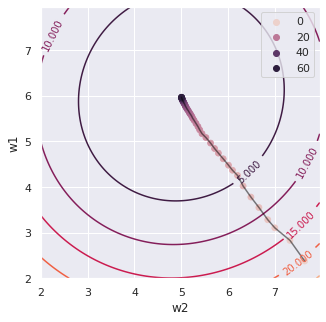

In [268]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);


Comment: We can acknowledge from the plot that it **is** smooth to the optimal solution.